# **學習分析工具實務應用:作業 1**
## 41271121H蔡廷軒

# 資料集主題:**15歲以上教育程度**─按年齡別、性別分
 主要欄位:15歲以上人口數、總計、識字、研究院_含博士班_、大學、專科_含二_三年制_五專後二年_、高中、高職_含五專前三年_、國中、初職、國小、自修、不識字

# 六個提問:
## 1.就讀研究所的人數佔所有人數之比例
## 2.15歲到65歲以上就讀大學為最高學歷人數的變化趨勢
## 3.65歲以上就讀大學為最高學歷的男女性別比值
## 4.總年齡男女不識字比值與65歲以上男女不識字比值之比值
## 5.各年齡段就讀高中為最高學歷之人數比較
## 6.各年齡段不識字人數之比較


## ||導入基本資料||


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import os
os.chdir("/content/gdrive/My Drive/112-2_LATIA") # 切換目錄
!ls -l
#目標資料--->15歲以上教育程度─按年齡別、性別分_112年 (1).csv

Mounted at /content/gdrive/
total 209
-rw------- 1 root root  92484 Feb 27 06:25  112_student.csv
-rw------- 1 root root 112488 Mar 12 07:50  112_students_tf.csv
-rw------- 1 root root   3713 Mar 21 17:35 '15歲以上教育程度─按年齡別、性別分_112年 (1).csv'
-rw------- 1 root root   4562 Feb 27 07:46  week2_0227.ipynb


## ||基本資料處理||

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file = './15歲以上教育程度─按年齡別、性別分_112年 (1).csv'

df = pd.read_csv(csv_file)

df.rename(columns={'15歲以上人口數': '總人口數', '研究所(含博士班)': '研究所', '專科(含二、三年制、五專後二年)': '專科', '高職(含五專前三年)': '高職'}, inplace=True)

print(df.head())

print(df.info())

df = df.set_index('總人口數') #將Index更換成總人口數column下的文字資料方便取用)

print(df.index)
print(df.columns)

                 總人口數        總計        識字      研究所       大學       專科       高中  \
0   112年/ 年齡別總計/ 性別總計  20627029  20472169  1775550  6242626  2239288  1595089   
1      112年/ 年齡別總計/ 男  10106129  10093257  1051218  3028744  1131904   802634   
2      112年/ 年齡別總計/ 女  10520900  10378912   724332  3213882  1107384   792455   
3  112年/ 15-19歲/ 性別總計   1036497   1036438        -   243347     5072   331955   
4     112年/ 15-19歲/ 男    541235    541203        -   126156     3072   171349   

        高職       國中     初職       國小     自修     不識字  
0  4452981  2239025  32920  1862467  32223  154860  
1  2321129  1100648  16606   634081   6293   12872  
2  2131852  1138377  16314  1228386  25930  141988  
3   362223    76325      -    17507      9      59  
4   191513    39973      -     9136      4      32  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   總人口數    36 non-

# 1.就讀研究所的人數佔所有人數之比例
此資料可了解有多少比例的人有就讀研究所

就讀研究所的人數佔所有人數約8.6%


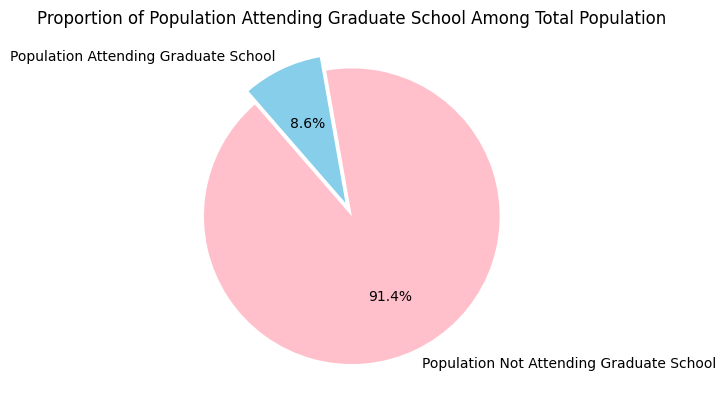

In [ ]:
total_GS_pop = df.loc['112年/ 年齡別總計/ 性別總計', '研究所']
total_GS_pop = float(total_GS_pop)
total_pop = df.loc['112年/ 年齡別總計/ 性別總計', '總計']

result1 = (total_GS_pop / total_pop)*100
result1 = round(result1, 1)

print("就讀研究所的人數佔所有人數約" + str(result1) + "%")

#繪製圓餅圖
labels = ['Population Attending Graduate School', 'Population Not Attending Graduate School']  #圓餅圖標籤
sizes = [8.6,91.4]  # 圓餅圖的百分比 總和相加需100%
colors = ['skyblue', 'pink']  # 圓餅圖的顏色
explode = (0.1, 0)  #將較小塊的圓餅區域凸顯出來

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=100, colors=colors, explode=explode)

plt.title('Proportion of Population Attending Graduate School Among Total Population')

plt.show()

# 2.15歲到65歲以上就讀大學為最高學歷人數的變化趨勢
此資料可觀察各個年齡區段就讀大學的人數，並可以此推估當時就讀大學的難易或是普及度等等




15歲到19歲就讀大學人數為243347人
20歲到24歲就讀大學人數為902647人
25歲到29歲就讀大學人數為1000663人
30歲到34歲就讀大學人數為979285人
35歲到39歲就讀大學人數為828697人
40歲到44歲就讀大學人數為698393人
45歲到49歲就讀大學人數為459230人
50歲到54歲就讀大學人數為306192人
55歲到59歲就讀大學人數為233910人
60歲到64歲就讀大學人數為194731人
65歲及以上就讀大學人數為395531人


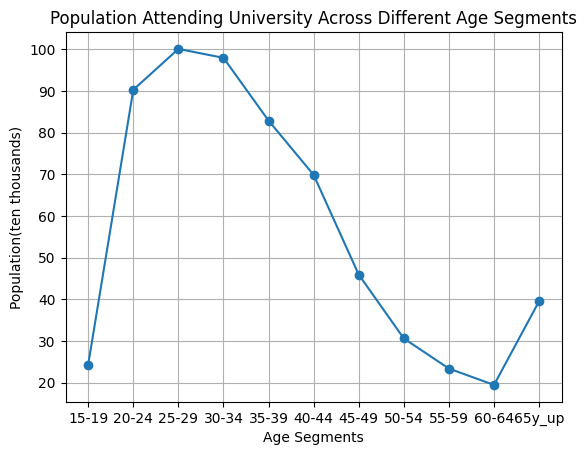

In [ ]:
univ_pop_15to19y = df.loc['112年/ 15-19歲/ 性別總計', '大學']
univ_pop_20to24y = df.loc['112年/ 20-24歲/ 性別總計', '大學']
univ_pop_25to29y = df.loc['112年/ 25-29歲/ 性別總計', '大學']
univ_pop_30to34y = df.loc['112年/ 30-34歲/ 性別總計', '大學']
univ_pop_35to39y = df.loc['112年/ 35-39歲/ 性別總計', '大學']
univ_pop_40to44y = df.loc['112年/ 40-44歲/ 性別總計', '大學']
univ_pop_45to49y = df.loc['112年/ 45-49歲/ 性別總計', '大學']
univ_pop_50to54y = df.loc['112年/ 50-54歲/ 性別總計', '大學']
univ_pop_55to59y = df.loc['112年/ 55-59歲/ 性別總計', '大學']
univ_pop_60to64y = df.loc['112年/ 60-64歲/ 性別總計', '大學']
univ_pop_65_and_above_y = df.loc['112年/ 65歲以上/ 性別總計', '大學']
print("15歲到19歲就讀大學人數為"+str(univ_pop_15to19y)+"人")
print("20歲到24歲就讀大學人數為"+str(univ_pop_20to24y)+"人")
print("25歲到29歲就讀大學人數為"+str(univ_pop_25to29y)+"人")
print("30歲到34歲就讀大學人數為"+str(univ_pop_30to34y)+"人")
print("35歲到39歲就讀大學人數為"+str(univ_pop_35to39y)+"人")
print("40歲到44歲就讀大學人數為"+str(univ_pop_40to44y)+"人")
print("45歲到49歲就讀大學人數為"+str(univ_pop_45to49y)+"人")
print("50歲到54歲就讀大學人數為"+str(univ_pop_50to54y)+"人")
print("55歲到59歲就讀大學人數為"+str(univ_pop_55to59y)+"人")
print("60歲到64歲就讀大學人數為"+str(univ_pop_60to64y)+"人")
print("65歲及以上就讀大學人數為"+str(univ_pop_65_and_above_y)+"人")

df1 = df[df.index.str.contains('性別總計')]
df1 = df1.drop(index='112年/ 年齡別總計/ 性別總計')
df1 = df1.reset_index('總人口數') #將總人口數由Index換回column方便取用
df1['人口數(年齡區段)'] = df1['總人口數'].str.extract(r'(\d+-\d+)')#新增新的column取出舊column裡的數字區段
df1['人口數(年齡區段)'] = df1['人口數(年齡區段)'].fillna("65y_up")#舊區段中有一個字串與其他不同，由此方式修正
df1['大學人數(萬人)'] = (df1['大學']/ 10000)#原先數值位數太多，故同除10000增加單位數值來表示

#繪製折線圖
plt.plot(df1['人口數(年齡區段)'], df1['大學人數(萬人)'], marker='o', linestyle='-')
plt.xlabel('Age Segments')
plt.ylabel('Population(ten thousands)')
plt.title('Population Attending University Across Different Age Segments')

# 顯示圖形
plt.grid(True)  # 加上網格線
plt.show()


# 3.65歲以上就讀大學為最高學歷的男女性別比值
#### (附上男女占比圓餅圖)此資料可知道當時男女性別與是否就讀大學之關係，更可得知當時對於學習之性別刻板印象。


65歲以上就讀大學的男女性別比值為:1.56


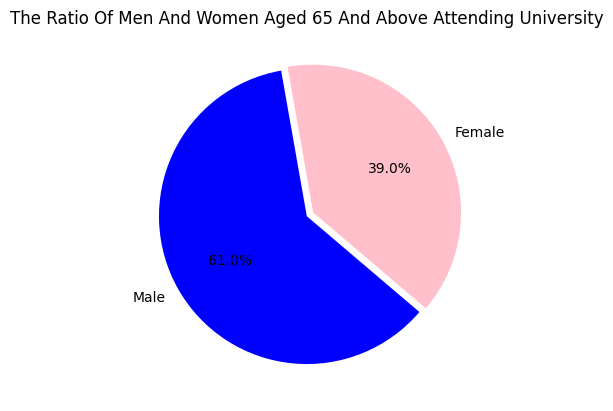

In [ ]:
univ_mal_65_and_above_y = df.loc['112年/ 65歲以上/ 男', '大學']
univ_fem_65_and_above_y = df.loc['112年/ 65歲以上/ 女', '大學']


result3 = univ_mal_65_and_above_y / univ_fem_65_and_above_y
result3 = round(result3, 2)
print("65歲以上就讀大學的男女性別比值為:"+str(result3))

A = round(univ_mal_65_and_above_y / univ_pop_65_and_above_y, 2)*100
B = round(univ_fem_65_and_above_y / univ_pop_65_and_above_y, 2)*100

#繪製圓餅圖
labels = ['Male', 'Female']  #圓餅圖標籤
sizes = [A,B]  # 圓餅圖的百分比 總和相加需100%
colors = ['blue', 'pink']  # 圓餅圖的顏色
explode = (0, 0.05)  #將較小塊的圓餅區域凸顯出來

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=100, colors=colors, explode=explode)

plt.title('The Ratio Of Men And Women Aged 65 And Above Attending University')

plt.show()


# 4.65歲以上男女不識字比值與總年齡男女不識字比值之比值
#### (附上65歲不識字佔總年齡不識字圓餅圖)此資料可得知隨著時代進步，對於學習之性別刻板印象有所改善的現象。

總年齡男女不識字比值為:0.09
65歲以上男女不識字比值為:0.08
65歲以上與總年齡男女不識字比值為:0.89


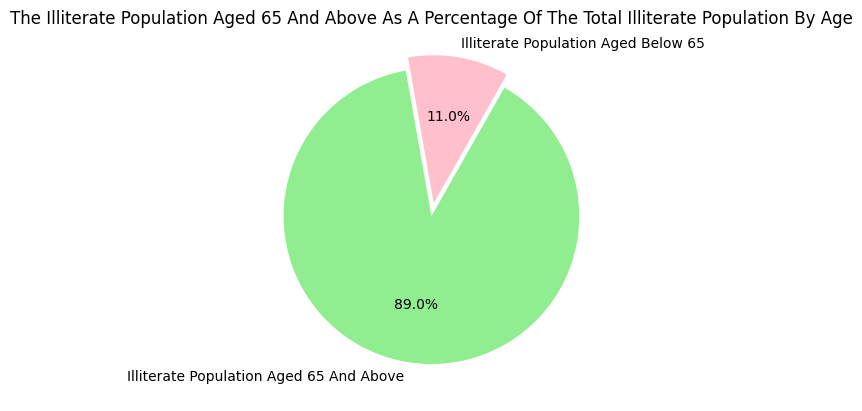

In [ ]:
CNR_mal_all = df.loc['112年/ 年齡別總計/ 男', '不識字']
CNR_fem_all = df.loc['112年/ 年齡別總計/ 女', '不識字']
CNR_mal_65_and_above = df.loc['112年/ 65歲以上/ 男', '不識字']
CNR_fem_65_and_above = df.loc['112年/ 65歲以上/ 女', '不識字']

result4_1 = CNR_mal_all / CNR_fem_all
result4_1 = round(result4_1, 2)
print("總年齡男女不識字比值為:"+str(result4_1))

result4_2 = CNR_mal_65_and_above / CNR_fem_65_and_above
result4_2 = round(result4_2, 2)
print("65歲以上男女不識字比值為:"+str(result4_2))

print("65歲以上與總年齡男女不識字比值為:"+str(round(result4_2/result4_1, 2)))

C = round(result4_2/result4_1, 2)*100
D = (1-round(result4_2/result4_1, 2))*100
#繪製圓餅圖
labels = ['Illiterate Population Aged 65 And Above', 'Illiterate Population Aged Below 65']  #圓餅圖標籤
sizes = [C,D]  # 圓餅圖的百分比 總和相加需100%
colors = ['lightgreen', 'pink']  # 圓餅圖的顏色
explode = (0, 0.09)  #將較小塊的圓餅區域凸顯出來

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=100, colors=colors, explode=explode)

plt.title('The Illiterate Population Aged 65 And Above As A Percentage Of The Total Illiterate Population By Age')

plt.show()

# 5.各年齡段就讀高中為最高學歷之人數比較
此資料可用來了解在每個年齡段僅就讀至高中之人數，並可以此了解當時普遍社會之教育程度及風氣。

15歲到19歲就讀高中為最高學歷人數為331955人
20歲到24歲就讀高中為最高學歷人數為41669人
25歲到29歲就讀高中為最高學歷人數為35273人
30歲到34歲就讀高中為最高學歷人數為39821人
35歲到39歲就讀高中為最高學歷人數為64411人
40歲到44歲就讀高中為最高學歷人數為92936人
45歲到49歲就讀高中為最高學歷人數為135589人
50歲到54歲就讀高中為最高學歷人數為168176人
55歲到59歲就讀高中為最高學歷人數為180586人
60歲到64歲就讀高中為最高學歷人數為173877人
65歲及以上就讀高中為最高學歷人數為330796人


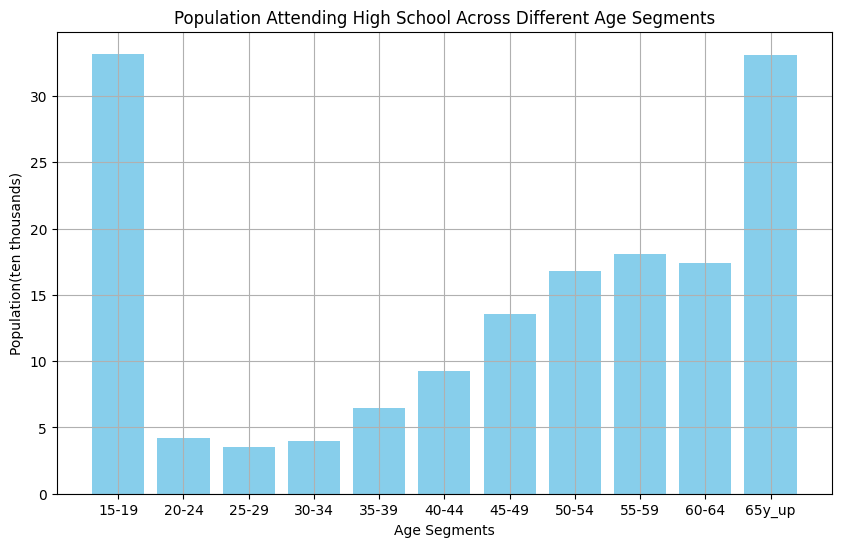

In [ ]:
high_pop_15to19y = df.loc['112年/ 15-19歲/ 性別總計', '高中']
high_pop_20to24y = df.loc['112年/ 20-24歲/ 性別總計', '高中']
high_pop_25to29y = df.loc['112年/ 25-29歲/ 性別總計', '高中']
high_pop_30to34y = df.loc['112年/ 30-34歲/ 性別總計', '高中']
high_pop_35to39y = df.loc['112年/ 35-39歲/ 性別總計', '高中']
high_pop_40to44y = df.loc['112年/ 40-44歲/ 性別總計', '高中']
high_pop_45to49y = df.loc['112年/ 45-49歲/ 性別總計', '高中']
high_pop_50to54y = df.loc['112年/ 50-54歲/ 性別總計', '高中']
high_pop_55to59y = df.loc['112年/ 55-59歲/ 性別總計', '高中']
high_pop_60to64y = df.loc['112年/ 60-64歲/ 性別總計', '高中']
high_pop_65_and_above_y = df.loc['112年/ 65歲以上/ 性別總計', '高中']
print("15歲到19歲就讀高中為最高學歷人數為"+str(high_pop_15to19y)+"人")
print("20歲到24歲就讀高中為最高學歷人數為"+str(high_pop_20to24y)+"人")
print("25歲到29歲就讀高中為最高學歷人數為"+str(high_pop_25to29y)+"人")
print("30歲到34歲就讀高中為最高學歷人數為"+str(high_pop_30to34y)+"人")
print("35歲到39歲就讀高中為最高學歷人數為"+str(high_pop_35to39y)+"人")
print("40歲到44歲就讀高中為最高學歷人數為"+str(high_pop_40to44y)+"人")
print("45歲到49歲就讀高中為最高學歷人數為"+str(high_pop_45to49y)+"人")
print("50歲到54歲就讀高中為最高學歷人數為"+str(high_pop_50to54y)+"人")
print("55歲到59歲就讀高中為最高學歷人數為"+str(high_pop_55to59y)+"人")
print("60歲到64歲就讀高中為最高學歷人數為"+str(high_pop_60to64y)+"人")
print("65歲及以上就讀高中為最高學歷人數為"+str(high_pop_65_and_above_y)+"人")

df2 = df[df.index.str.contains('性別總計')]
df2 = df2.drop(index='112年/ 年齡別總計/ 性別總計')
df2 = df2.reset_index('總人口數') #將總人口數由Index換回column方便取用
df2['人口數(年齡區段)'] = df2['總人口數'].str.extract(r'(\d+-\d+)')#新增新的column取出舊column裡的數字區段
df2['人口數(年齡區段)'] = df2['人口數(年齡區段)'].fillna("65y_up")#舊區段中有一個字串與其他不同，由此方式修正
df2['高中人數(萬人)'] = (df2['高中']/ 10000)#原先數值位數太多，故同除10000增加單位數值來表示

#繪製長條圖

plt.figure(figsize=(10, 6))
plt.bar(df2['人口數(年齡區段)'], df2['高中人數(萬人)'], color='skyblue')
plt.xlabel('Age Segments')
plt.ylabel('Population(ten thousands)')
plt.title('Population Attending High School Across Different Age Segments')

# 顯示圖形
plt.grid(True)  # 加上網格線
plt.show()



# 6.各年齡段不識字人數之比較
(附上包含及不包含65歲以上民眾的橫條圖)此資料除了得知各年齡區間不識字的人數，更可了解台灣基礎教育的快速普及、進步。

15歲到19歲不識字人數為59人
20歲到24歲不識字人數為18人
25歲到29歲不識字人數為25人
30歲到34歲不識字人數為71人
35歲到39歲不識字人數為168人
40歲到44歲不識字人數為509人
45歲到49歲不識字人數為865人
50歲到54歲不識字人數為1139人
55歲到59歲不識字人數為1459人
60歲到64歲不識字人數為3297人
65歲及以上不識字人數為147250人


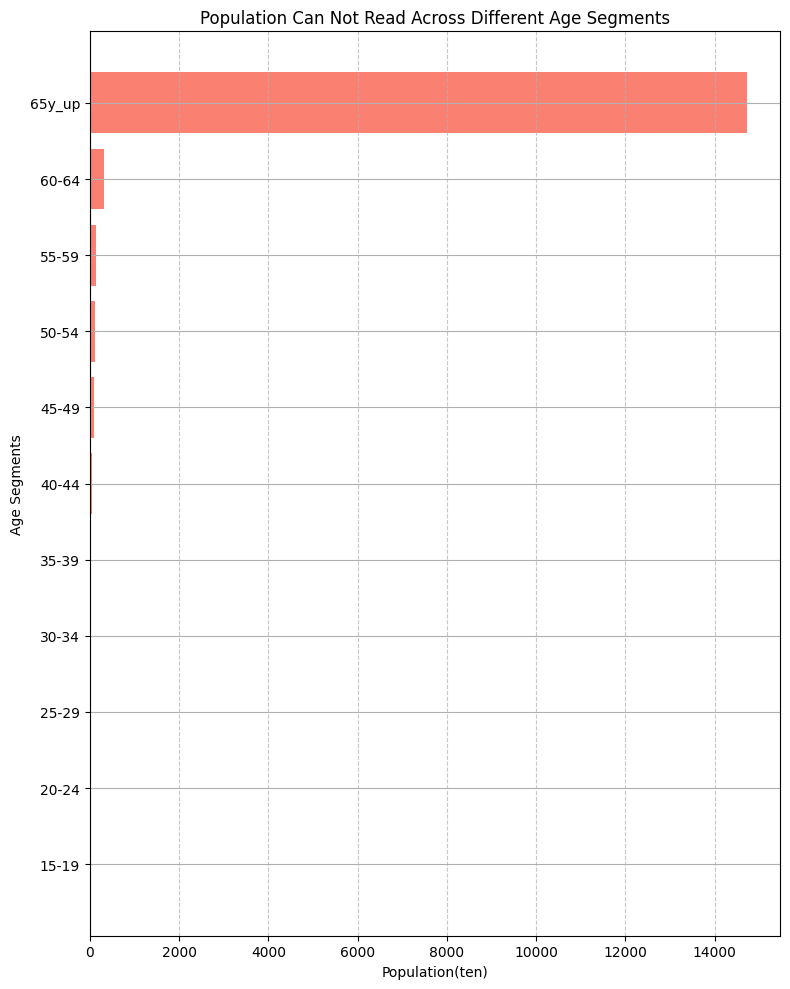

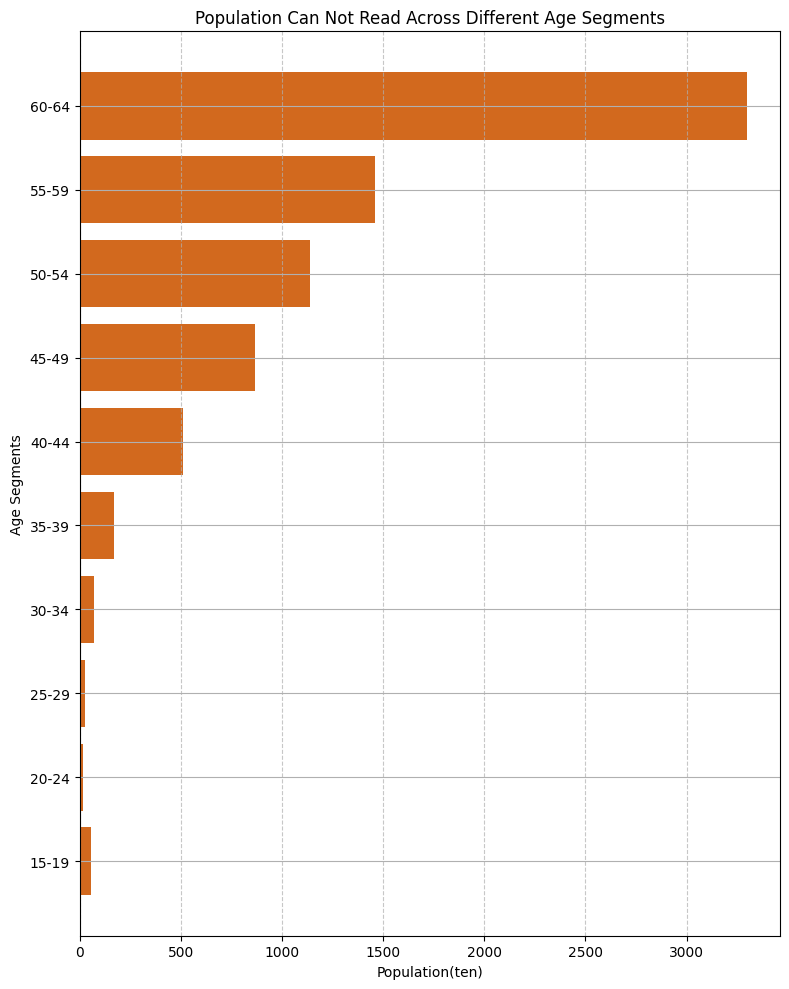

In [ ]:
CNR_pop_15to19y = df.loc['112年/ 15-19歲/ 性別總計', '不識字']
CNR_pop_20to24y = df.loc['112年/ 20-24歲/ 性別總計', '不識字']
CNR_pop_25to29y = df.loc['112年/ 25-29歲/ 性別總計', '不識字']
CNR_pop_30to34y = df.loc['112年/ 30-34歲/ 性別總計', '不識字']
CNR_pop_35to39y = df.loc['112年/ 35-39歲/ 性別總計', '不識字']
CNR_pop_40to44y = df.loc['112年/ 40-44歲/ 性別總計', '不識字']
CNR_pop_45to49y = df.loc['112年/ 45-49歲/ 性別總計', '不識字']
CNR_pop_50to54y = df.loc['112年/ 50-54歲/ 性別總計', '不識字']
CNR_pop_55to59y = df.loc['112年/ 55-59歲/ 性別總計', '不識字']
CNR_pop_60to64y = df.loc['112年/ 60-64歲/ 性別總計', '不識字']
CNR_pop_65_and_above_y = df.loc['112年/ 65歲以上/ 性別總計', '不識字']
print("15歲到19歲不識字人數為"+str(CNR_pop_15to19y)+"人")
print("20歲到24歲不識字人數為"+str(CNR_pop_20to24y)+"人")
print("25歲到29歲不識字人數為"+str(CNR_pop_25to29y)+"人")
print("30歲到34歲不識字人數為"+str(CNR_pop_30to34y)+"人")
print("35歲到39歲不識字人數為"+str(CNR_pop_35to39y)+"人")
print("40歲到44歲不識字人數為"+str(CNR_pop_40to44y)+"人")
print("45歲到49歲不識字人數為"+str(CNR_pop_45to49y)+"人")
print("50歲到54歲不識字人數為"+str(CNR_pop_50to54y)+"人")
print("55歲到59歲不識字人數為"+str(CNR_pop_55to59y)+"人")
print("60歲到64歲不識字人數為"+str(CNR_pop_60to64y)+"人")
print("65歲及以上不識字人數為"+str(CNR_pop_65_and_above_y)+"人")

df3 = df[df.index.str.contains('性別總計')]
df3 = df3.drop(index='112年/ 年齡別總計/ 性別總計')
df3 = df3.reset_index('總人口數') #將總人口數由Index換回column方便取用
df3['人口數(年齡區段)'] = df3['總人口數'].str.extract(r'(\d+-\d+)')#新增新的column取出舊column裡的數字區段
df3['人口數(年齡區段)'] = df3['人口數(年齡區段)'].fillna("65y_up")#舊區段中有一個字串與其他不同，由此方式修正
df3['不識字人數(十人)'] = (df3['不識字']/ 10)#原先數值位數太多，故同除10增加單位數值來表示

# 繪製橫條圖1
plt.figure(figsize=(8, 10))  # 調整圖的大小
plt.barh(df3['人口數(年齡區段)'], df3['不識字人數(十人)'], color='salmon')
plt.xlabel('Population(ten)')
plt.ylabel('Age Segments')
plt.title('Population Can Not Read Across Different Age Segments')
plt.tight_layout()  # 調整圖的外觀，使其更美觀
plt.grid(axis='x', linestyle='--', alpha=0.7)
# 顯示圖形
plt.grid(True)  # 加上網格線
plt.show()

#去除65歲以上
df4 = df[df.index.str.contains('性別總計')]
df4 = df4.drop(index='112年/ 年齡別總計/ 性別總計')
df4 = df4.drop(index='112年/ 65歲以上/ 性別總計')
df4 = df4.reset_index('總人口數') #將總人口數由Index換回column方便取用
df4['人口數(年齡區段)'] = df4['總人口數'].str.extract(r'(\d+-\d+)')#新增新的column取出舊column裡的數字區段

# 繪製橫條圖2
plt.figure(figsize=(8, 10))  # 調整圖的大小
plt.barh(df4['人口數(年齡區段)'], df4['不識字'], color='chocolate')
plt.xlabel('Population(ten)')
plt.ylabel('Age Segments')
plt.title('Population Can Not Read Across Different Age Segments')
plt.tight_layout()  # 調整圖的外觀，使其更美觀
plt.grid(axis='x', linestyle='--', alpha=0.7)
# 顯示圖形
plt.grid(True)  # 加上網格線
plt.show()